## Timeseries for Open Data Example

This example demonstrates how to extract a time series for a single point, and visualise it as  an interactive meterogram.

In [ ]:
import earthkit.data

LOCATION = [[-9.11, 38.79]]

request = {
    "class": "ai",
    "stream" : "oper",
    "type" : "fc",
    "date" : "20250224",
    "time" : "0000",
    "levtype" : "sfc",
    "expver" : "0102", 
    "model": "aifs-single",
    "domain" : "g",
    "param" : "166/167/169", 
    "feature" : {
        "type" : "timeseries",
        "points": [[-9.10, 38.78], [1.10, 2.78]],
        "axes": "step",
        "range": {"start": 0, "end": 360}
    },
}

ds = earthkit.data.from_source(
    "polytope",
    "ecmwf-mars",
    request,
    stream=False,
    address='polytope.ecmwf.int',
)

## Visualise 

The following visualisation uses [earthkit-plots](https://earthkit-plots.readthedocs.io/en/latest/).

<div style="padding: 20px; background-color: #ffdddd; border-left: 6px solid #f44336; margin-bottom: 15px; width: 95%;">
    <strong>Note</strong>: This notebook is rendered in many different ways depending on where you are viewing it (e.g. GitHub, Jupyter, readthedocs etc.). To maximise compatibility with many possible rendering methods, all interactive plots are rendered with <code>chart.show(renderer="png")</code>, which removes all interactivity and only shows a PNG image render.<br><br>
    If you are running this notebook in an interactive session yourself and would like to interact with the plots, remove the <code>renderer="png"</code> argument from each call to <code>chart.show()</code>.
</div>

In [2]:
def location_to_string(location):
    """
    Converts latitude and longitude to a string representation with degrees
    and N/S/E/W.
    """
    (lat, lon) = location[0]
    lat_dir = "N" if lat >= 0 else "S"
    lon_dir = "E" if lon >= 0 else "W"
    return f"{abs(lat):.2f}°{lat_dir}, {abs(lon):.2f}°{lon_dir}"

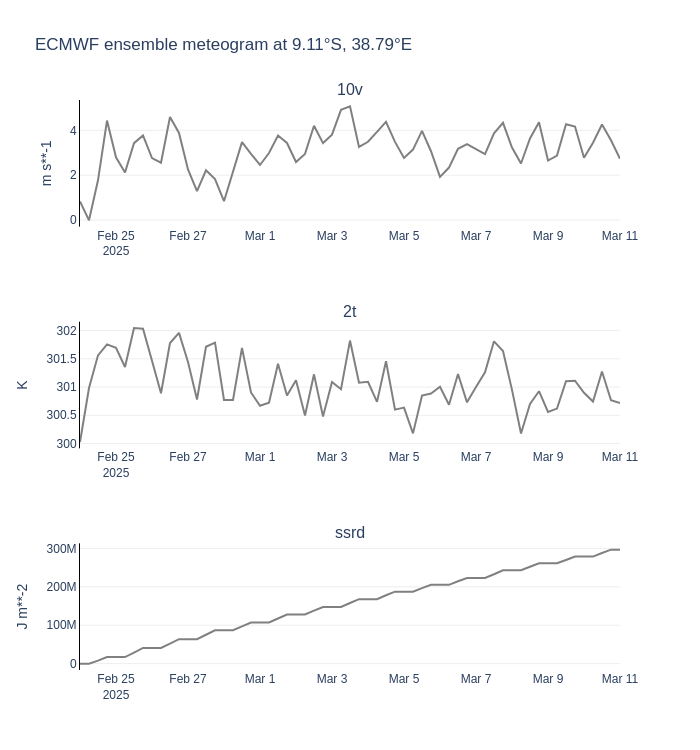

In [3]:
from earthkit.plots.interactive import Chart

TIME_FREQUENCY = "6h"
QUANTILES = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

chart = Chart()
chart.title(f"ECMWF ensemble meteogram at {location_to_string(LOCATION)}")
#chart.box(ds, time_frequency=TIME_FREQUENCY, quantiles=QUANTILES)
chart.line(ds, line_color='grey', time_frequency=TIME_FREQUENCY)
chart.show(renderer="png")  # Replace with chart.show() in an interactive session!

## Convert to Xarray

In [4]:
da = ds.to_xarray()
print(da)

<xarray.Dataset> Size: 2kB
Dimensions:   (x: 1, y: 1, z: 1, number: 1, datetime: 1, t: 61)
Coordinates:
  * x         (x) float64 8B 0.9836
  * y         (y) float64 8B 2.812
  * z         (z) int64 8B 0
  * number    (number) int64 8B 0
  * datetime  (datetime) <U20 80B '2025-02-24T00:00:00Z'
  * t         (t) datetime64[ns] 488B 2025-02-24 ... 2025-03-11
Data variables:
    10v       (x, y, z, number, datetime, t) float64 488B 0.8319 ... 2.732
    2t        (x, y, z, number, datetime, t) float64 488B 300.0 301.0 ... 300.7
    ssrd      (x, y, z, number, datetime, t) float64 488B 0.0 0.0 ... 2.967e+08
Attributes:
    class:          ai
    Forecast date:  2025-02-24T00:00:00Z
    domain:         g
    expver:         0102
    levtype:        sfc
    model:          aifs-single
    stream:         oper
    type:           fc
    number:         0
